# Assignment 10: More on Choropleth, Folium Map, and Raster Data

In [1]:
!pip install mapclassify #helper package
!pip install osmnx
!pip install rioxarray

import geopandas as gpd # import geopandas
import osmnx as ox # import osmnx
import folium as fm # import folium
import rioxarray as rxr #import rioxarray

# packages you already familiar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import shapely.geometry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 804.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 43.3 MB/s eta 0:00:00


*NOTE: YOU MAY ENCOUNTER WARNING MESSGAE WHEN RUNNING THE GIVEN CODE AND SOLUTION, PLEASE INGORE IT*

## Q1. Health Network Fairness in Choropleth

### Q1a

**Your Text Answer**
1. Key: 'amenity'; Value: 'hospital'
2. Key: 'amenity'; Value: 'clinic'
3. Key: 'amenity'; Vlaue: 'doctor'


### Q1b

In [61]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
place = 'toronto, ontario, canada'
tag = {'amenity': ['hospital', 'clinic']}
toronto_hospital = gpd.read_file('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/toronto_hospital.geojson')
#toronto_hospital = toronto_hospital[toronto_hospital['emergency'] == 'yes'][['name', 'geometry']].reset_index(drop=True)
toronto_hospital['proerpty_type'] = 'hospital'
toronto_hospital['geometry'] = toronto_hospital['geometry'].apply(lambda x: x.centroid)
toronto_hospital.head()

,name,proerpty_type,geometry
0,Scarborough Health Network - Centenary Hospital,hospital,POINT (-79.20481 43.78025)
1,Centre For Addiction and Mental Health - Queen...,hospital,POINT (-79.41864 43.64300)
2,Sunnybrook Health Sciences Centre - Bayview Ca...,hospital,POINT (-79.37479 43.72270)
3,Toronto Western Hospital,hospital,POINT (-79.40548 43.65351)
4,St. Joseph's Health Centre,hospital,POINT (-79.45006 43.64030)


In [62]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
!wget https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lfsa000a16a_e.zip
!unzip lfsa000a16a_e.zip -d lfsa000a16a_e

toronto_FSA = gpd.read_file('lfsa000a16a_e')
# 'CFSAUID' start with m
toronto_FSA = toronto_FSA[toronto_FSA['CFSAUID'].str.startswith('M')]
toronto_FSA = toronto_FSA[['CFSAUID', 'geometry']]
toronto_FSA['proerpty_type'] = 'FSA'
toronto_FSA.columns = ['name', 'geometry', 'proerpty_type']
toronto_FSA.head()

--2024-03-31 23:21:51--  https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lfsa000a16a_e.zip
Resolving www12.statcan.gc.ca (www12.statcan.gc.ca)... 167.44.105.15
Connecting to www12.statcan.gc.ca (www12.statcan.gc.ca)|167.44.105.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15662579 (15M) [application/x-zip-compressed]
Saving to: ‘lfsa000a16a_e.zip.4’

lfsa000a16a_e.zip.4 100%[===================>]  14.94M  2.49MB/s    in 7.7s    

2024-03-31 23:21:59 (1.94 MB/s) - ‘lfsa000a16a_e.zip.4’ saved [15662579/15662579]

Archive:  lfsa000a16a_e.zip
replace lfsa000a16a_e/lfsa000a16a_e.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: lfsa000a16a_e/lfsa000a16a_e.dbf  
  inflating: lfsa000a16a_e/lfsa000a16a_e.prj  
  inflating: lfsa000a16a_e/lfsa000a16a_e.shp  
  inflating: lfsa000a16a_e/lfsa000a16a_e.shx  
  inflating: lfsa000a16a_e/forward_sortation_area.html  
  inflating: lfsa000a16a_e/92-179-g2016001-eng.pdf  


,name,geometry,proerpty_type
637,M9R,"POLYGON ((7209908.140 928259.897, 7209816.766 ...",FSA
638,M9V,"POLYGON ((7206682.694 937743.451, 7206631.563 ...",FSA
639,M9W,"POLYGON ((7210531.760 934710.503, 7210542.117 ...",FSA
701,M1P,"POLYGON ((7233594.731 942118.174, 7233584.157 ...",FSA
702,M1R,"MULTIPOLYGON (((7231166.760 939882.914, 723135...",FSA


In [63]:
### Your code here ###
#check and update CRS; concat gdf
def prepare_gdf(hospitals, fsa):
    #check and update CRS to EPSG:4326 if they are not the same
    if hospitals.crs.to_string() != 'EPSG:4326':
        hospitals = hospitals.to_crs(epsg=4326)
    if fsa.crs.to_string() != 'EPSG:4326':
        fsa = fsa.to_crs(epsg=4326)

    #concat the two gdf
    gdf_all = gpd.GeoDataFrame(pd.concat([hospitals, fsa], ignore_index=True))

    return gdf_all

#prepare the combined gdf
gdf_all = prepare_gdf(toronto_hospital, toronto_FSA)

gdf_all.head()

,name,proerpty_type,geometry
0,Scarborough Health Network - Centenary Hospital,hospital,POINT (-79.20481 43.78025)
1,Centre For Addiction and Mental Health - Queen...,hospital,POINT (-79.41864 43.64300)
2,Sunnybrook Health Sciences Centre - Bayview Ca...,hospital,POINT (-79.37479 43.72270)
3,Toronto Western Hospital,hospital,POINT (-79.40548 43.65351)
4,St. Joseph's Health Centre,hospital,POINT (-79.45006 43.64030)


### Q1c

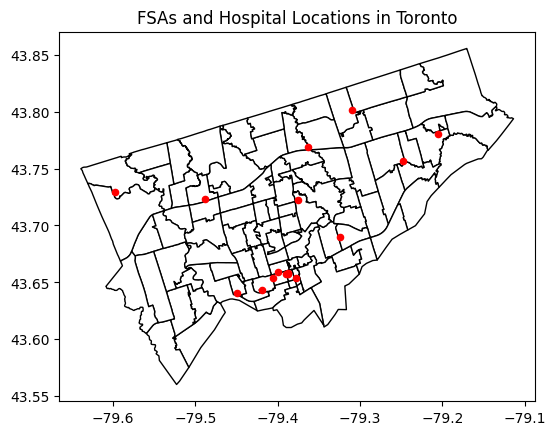

In [64]:
### Your code here ###
#diplay the choropleth
ax = gdf_all[gdf_all['proerpty_type'] == 'FSA'].plot(color='white', edgecolor='black')
gdf_all[gdf_all['proerpty_type'] == 'hospital'].plot(ax=ax, color='red', markersize=20)
ax.set_title('FSAs and Hospital Locations in Toronto')

plt.show()

**Your Text Answer**

Yes, the choropleth indicates an imbalance in hospital distribution, with hospitals concentrated centrally and fewer in outlying areas.

### Q1d

In [65]:
# calculate the centroid of each row in gdf_all if it is a polygon or MultiPolygon
## Your code here ###
from shapely.geometry import Point, Polygon, MultiPolygon

def calc_centroid(gdf):
    #adds a 'centroid' column to the GeoDataFrame
    #if it a polygon or multipolygon, the centroid is calculated
    #otw it uses the existing geometry
    gdf['centroid'] = gdf.apply(
        lambda row: row['geometry'].centroid if isinstance(row['geometry'],
         (Polygon, MultiPolygon))
        else row['geometry'],
        axis=1
    )
    return gdf

gdf_all = calc_centroid(gdf_all)

gdf_all
##your code end here ###

,name,proerpty_type,geometry,centroid
0,Scarborough Health Network - Centenary Hospital,hospital,POINT (-79.20481 43.78025),POINT (-79.20481 43.78025)
1,Centre For Addiction and Mental Health - Queen...,hospital,POINT (-79.41864 43.64300),POINT (-79.41864 43.64300)
2,Sunnybrook Health Sciences Centre - Bayview Ca...,hospital,POINT (-79.37479 43.72270),POINT (-79.37479 43.72270)
3,Toronto Western Hospital,hospital,POINT (-79.40548 43.65351),POINT (-79.40548 43.65351)
4,St. Joseph's Health Centre,hospital,POINT (-79.45006 43.64030),POINT (-79.45006 43.64030)
...,...,...,...,...
107,M6M,FSA,"POLYGON ((-79.46802 43.70291, -79.46710 43.699...",POINT (-79.48531 43.69389)
108,M6N,FSA,"POLYGON ((-79.48663 43.68739, -79.48322 43.685...",POINT (-79.48394 43.67458)
109,M6P,FSA,"POLYGON ((-79.44535 43.65812, -79.44523 43.657...",POINT (-79.46344 43.66026)
110,M5P,FSA,"POLYGON ((-79.39619 43.69612, -79.39610 43.695...",POINT (-79.41247 43.69641)


In [69]:
# calculate the distance matrix between each FSA centriod and hospital
## Your code here ###
def calc_distance_matrix(gdf_all, fsa_col='FSA', hospital_col='hospital') -> pd.DataFrame:

    #filter FSAs and hospitals from gdf_all
    fsas = gdf_all[gdf_all['proerpty_type'] == fsa_col].reset_index(drop=True)
    hospitals = gdf_all[gdf_all['proerpty_type'] == hospital_col].reset_index(drop=True)

    #init the distance matrix with zeros
    distance_matrix = np.zeros((len(fsas), len(hospitals)))

    #calc distance
    for i in range(len(fsas)):
        for j in range(len(hospitals)):
            distance = fsas.at[i, 'centroid'].distance(hospitals.at[j, 'centroid'])
            distance_matrix[i, j] = distance

    #conv the distance matrix to a df
    distance_df = pd.DataFrame(distance_matrix, index=fsas['name'], columns=hospitals['name'])
    return distance_df

distance_df = calc_distance_matrix(gdf_all)
distance_df


name,Scarborough Health Network - Centenary Hospital,Centre For Addiction and Mental Health - Queen Street Site,Sunnybrook Health Sciences Centre - Bayview Campus,Toronto Western Hospital,St. Joseph's Health Centre,Michael Garron Hospital,Etobicoke General Hospital,Humber River Hospital,Scarborough Health Network - General Campus,Scarborough Health Network - Birchmount Hospital,North York General Hospital,Toronto General Hospital,Hospital for Sick Children,Mount Sinai Hospital,Centre For Addiction and Mental Health - College Street Site,St. Michael's Hospital
name,,,,,,,,,,,,,,,,
M9R,0.365086,0.146369,0.186494,0.156309,0.117911,0.233066,0.057618,0.078006,0.317728,0.273428,0.211529,0.172316,0.173130,0.170388,0.161292,0.183388
M9V,0.391324,0.202029,0.220449,0.208868,0.176941,0.274522,0.013983,0.107479,0.346817,0.290978,0.233110,0.222667,0.223731,0.221119,0.212260,0.234141
M9W,0.385836,0.178507,0.209764,0.187347,0.151057,0.259992,0.023838,0.096522,0.339601,0.289709,0.229242,0.202582,0.203500,0.200794,0.191738,0.213871
M1P,0.067660,0.190490,0.111969,0.173655,0.217406,0.090713,0.329641,0.222007,0.022906,0.055718,0.092980,0.157066,0.157537,0.159487,0.165377,0.152953
M1R,0.097361,0.161511,0.082105,0.144695,0.187853,0.065660,0.301504,0.193196,0.049884,0.053526,0.068432,0.128541,0.129104,0.130923,0.136407,0.125230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M6M,0.293495,0.083878,0.114210,0.089463,0.064147,0.160427,0.118097,0.029711,0.245643,0.206280,0.143825,0.103353,0.104378,0.101740,0.092832,0.114795
M6N,0.298467,0.072537,0.119286,0.081238,0.048196,0.159750,0.126477,0.049066,0.249968,0.215880,0.153721,0.097104,0.097915,0.095173,0.086078,0.108181
M6P,0.285114,0.048019,0.108432,0.058355,0.024037,0.141657,0.151200,0.067982,0.236166,0.209063,0.148295,0.075310,0.075937,0.073178,0.064175,0.085895


### Q1e

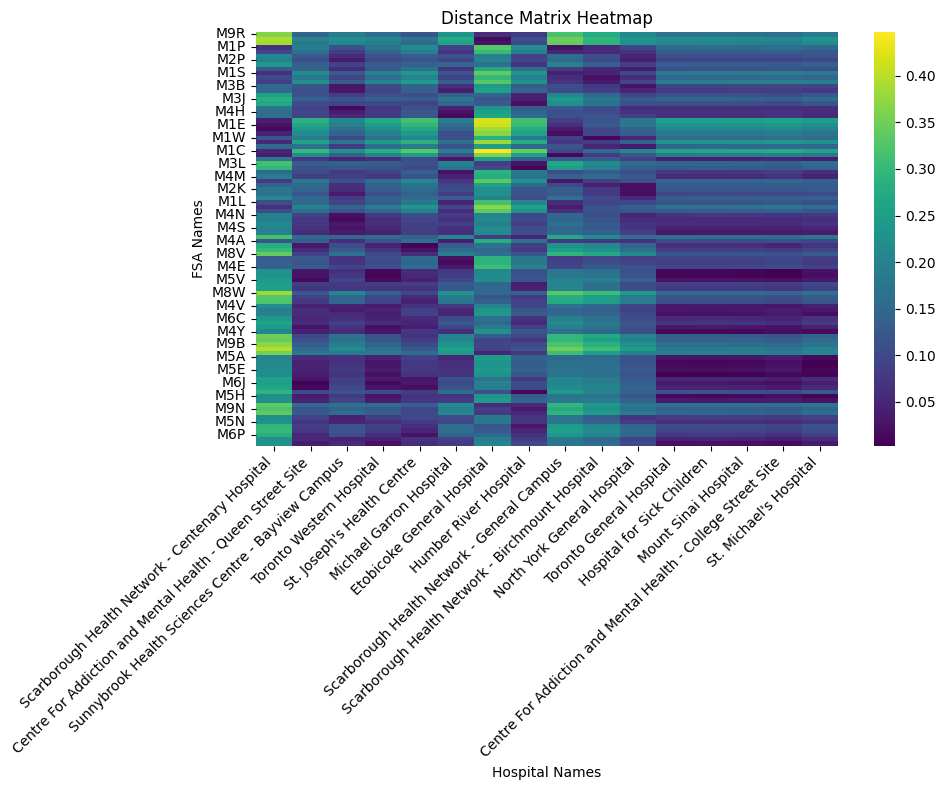

In [70]:
warnings.filterwarnings('ignore')
import seaborn as sns
### you code here##
#plot the heatmap
distance_matrix = distance_df.apply(pd.to_numeric)
plt.figure(figsize=(10,8))
sns.heatmap(distance_matrix, annot=False, cmap='viridis')
plt.title('Distance Matrix Heatmap')
plt.xlabel('Hospital Names')
plt.ylabel('FSA Names')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Your Text Answer**

The heatmap suggests potential imbalances with certain FSAs having uniformly longer distances to hospitals, but the dense color overlap makes detailed insights difficult.

## Q2: Visualizing Health Network Fairness


### Q2a

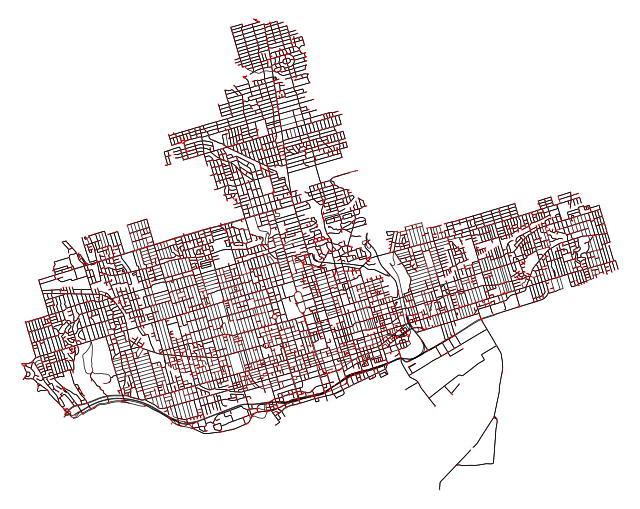

(5759, 15184)

In [72]:
## you code here ##
place_name = "Toronto, Ontario, Canada"
network_type = "drive"

graph = ox.graph_from_place(place_name, network_type=network_type)

nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)

fig, ax = ox.plot_graph(graph, node_size=1, node_color='red',
                        edge_linewidth=0.5, edge_color='black', bgcolor='white')

number_of_nodes = len(nodes)
number_of_edges = len(edges)

number_of_nodes, number_of_edges
# the solution might take > 1 min to run

**your text answer**

There are 5759 nodes and 15184 edges.

### Q2b

In [73]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
distance_matrix_by_shortest_path = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/distance_matrix_by_shortest_path.csv', index_col=0)
# create a new pandas series to store the nearest distance
smallest_distance_by_shortest_path = distance_matrix_by_shortest_path.min(axis=1)
# assign the name of the series for future merging
smallest_distance_by_shortest_path.name = 'nearest_hospital'

# obtain all row that is a foward sortation area
toronto_FSA.to_crs(epsg=4326, inplace=True)
toronto_FSA['centroid'] = toronto_FSA['geometry'].apply(lambda x: x.centroid)
# merge the distance series with the FSA shape data
gdf_smallest_distance_by_shortest_path = toronto_FSA.merge(smallest_distance_by_shortest_path, left_on='name', right_index=True).rename(columns={0: 'nearest_hospital'})
gdf_smallest_distance_by_shortest_path.head()
# your output should be exactly the same as the expected output, if not, re-run given code in Q1

,name,geometry,proerpty_type,centroid,nearest_hospital
637,M9R,"POLYGON ((-79.56131 43.67478, -79.56249 43.674...",FSA,POINT (-79.55799 43.68778),6973.215
638,M9V,"POLYGON ((-79.57759 43.76205, -79.57829 43.761...",FSA,POINT (-79.59433 43.74274),1854.019
639,M9W,"POLYGON ((-79.53885 43.72937, -79.53884 43.728...",FSA,POINT (-79.58416 43.70983),2981.682
701,M1P,"POLYGON ((-79.24704 43.75374, -79.24720 43.753...",FSA,POINT (-79.27000 43.76213),2710.604
702,M1R,"MULTIPOLYGON (((-79.28125 43.73867, -79.27985 ...",FSA,POINT (-79.29717 43.74945),4471.884


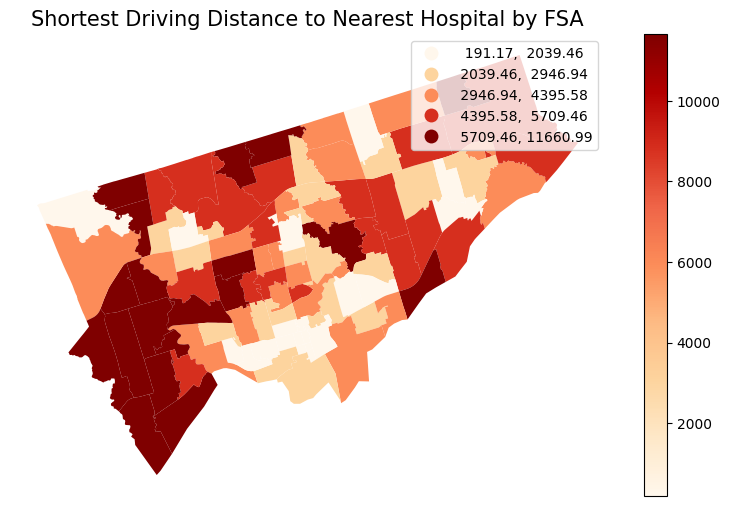

In [74]:
## you code here ##
import mapclassify

gdf_smallest_distance_by_shortest_path['nearest_hospital'] = gdf_smallest_distance_by_shortest_path['nearest_hospital'].astype(float)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf_smallest_distance_by_shortest_path.plot(column='nearest_hospital',
                                            ax=ax,
                                            legend=True,
                                            cmap='OrRd',
                                            scheme='quantiles')

ax.axis('off')

ax.set_title('Shortest Driving Distance to Nearest Hospital by FSA',
             fontdict={'fontsize': '15', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='OrRd',
                           norm=plt.Normalize(vmin=gdf_smallest_distance_by_shortest_path['nearest_hospital'].min(),
                                                           vmax=gdf_smallest_distance_by_shortest_path['nearest_hospital'].max()))
#empty array for the data range
sm._A = []
#add the colorbar to the fig
cbar = fig.colorbar(sm)

plt.show()

**your text answer**


The choropleth map shows an imbalance, with some FSAs having significantly longer distances to the nearest hospital, as indicated by the darker areas.

### Q2c

In [77]:
## DO NOT MODIFY ##
warnings.filterwarnings('ignore')
census_data = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/2016_census.csv').iloc[:, 1:]
census_data.columns = ['name', 'median_income', 'population','visual_minority']
census_data['prec_visual_minority'] = census_data['visual_minority'] / census_data['population']
census_data = toronto_FSA.merge(census_data, on='name')
census_data = census_data[['name','prec_visual_minority','centroid']]
census_data

# your output should be exactly the same as the expected output, if not, re-run given code in Q1

,name,prec_visual_minority,centroid
0,M9R,0.544557,POINT (-79.55799 43.68778)
1,M9V,0.814882,POINT (-79.59433 43.74274)
2,M9W,0.689214,POINT (-79.58416 43.70983)
3,M1P,0.737640,POINT (-79.27000 43.76213)
4,M1R,0.564003,POINT (-79.29717 43.74945)
...,...,...,...
91,M6M,0.599755,POINT (-79.48531 43.69389)
92,M6N,0.435710,POINT (-79.48394 43.67458)
93,M6P,0.251280,POINT (-79.46344 43.66026)
94,M5P,0.209288,POINT (-79.41247 43.69641)


In [81]:
# empty folium map
nearest_hospital_map = fm.Map(location=[43.7, -79.4], zoom_start=12,
                                  scrollWheelZoom=False, tiles=None,
                                    control_scale=True)
# geo-json file with vector shape of FSA
FSA_json = gdf_smallest_distance_by_shortest_path[['name', 'geometry']].to_json()

## you code here ##
from folium import Choropleth, LayerControl, FeatureGroup, CircleMarker
merged_data = pd.merge(census_data, gdf_smallest_distance_by_shortest_path, on='name')

fm.TileLayer('openstreetmap').add_to(nearest_hospital_map)

Choropleth(
    geo_data=FSA_json,
    name='Hospital Distance',
    data=merged_data,  # This should be the merged DataFrame with 'nearest_hospital' data
    columns=['name', 'nearest_hospital'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Shortest driving distance to the nearest hospital (meters)',
    bins=[merged_data['nearest_hospital'].quantile(q) for q in [0, 0.25, 0.5, 0.75, 1]],
    reset=True
).add_to(nearest_hospital_map)

circle_feature_group = FeatureGroup(name='Visual Minority Percentage')
for idx, row in census_data.iterrows():
    CircleMarker(
        location=[row['centroid'].y, row['centroid'].x],  # Assuming centroid is a Point object
        radius=row['prec_visual_minority'] * 20,  # Adjust the multiplier for visibility
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f'Visual Minorities: {row["prec_visual_minority"]:.2%}'
    ).add_to(circle_feature_group)

circle_feature_group.add_to(nearest_hospital_map)

LayerControl().add_to(nearest_hospital_map)

nearest_hospital_map

### Q2d
**your text answer**


The map suggests no clear visual correlation between the percentage of visual minorities and the shortest driving distance to hospitals; areas with higher percentages of visual minorities display varying hospital accessibility.

## Q3: Raster Data (OPTIONAL: THIS QUESTION DOES NOT COUNT TOWARDS THE TOTAL GRADE)

In [ ]:
## DO NOT MODIFY ##
warnings.filterwarnings('ignore')
url = 'https://www.arcgis.com/sharing/rest/content/items/4b1863b58f9a4aa98f3eb4e95299cff2/data'
raster_data = rxr.open_rasterio(url,masked=True).squeeze() # open the raster data

### Q3a

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
## your code here ##
# plot the raster_data
# you might encounter following error when plotting  'ERROR 1: Line 22: </table> doesn't have matching <table>'
# please let the code run, it will generate the plot.

In [ ]:
# what is the shape, the CRS?


**your text answer**

### Q3b

In [ ]:
import xarray as xr
## your code here ##


**you text answer**

### Q3c
**you text answer**